In [20]:
import pandas as pd
import pandahouse as ph
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
connection_default = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [3]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
    SELECT COUNT()
    
    FROM ldn_listings
        
    LIMIT 10
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,count()
0,85207


In [17]:
# создаем запрос, db автоматически заменится на значение из database
q2 = '''
    SELECT
        id,
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price
    FROM ldn_listings
    ORDER BY 
        id ASC

    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
london_df = ph.read_clickhouse(query=q2, connection=connection_default)
london_df

,id,room_type,price
0,13913,Private room,65.0
1,15400,Entire home/apt,100.0
2,17402,Entire home/apt,300.0
3,17506,Private room,150.0
4,25023,Entire home/apt,65.0
...,...,...,...
995,541081,Entire home/apt,110.0
996,541363,Entire home/apt,110.0
997,542231,Private room,65.0
998,542646,Entire home/apt,100.0


In [18]:
london_df.groupby('room_type').quantile(q=0.75)

,id,price
room_type,,
Entire home/apt,463610.50,160.00
Hotel room,73302.50,157.00
Private room,453442.50,70.00
Shared room,472261.75,69.25


In [26]:
# создаем запрос, db автоматически заменится на значение из database
q3 = '''
    SELECT
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price,
        toFloat32OrNull(review_scores_rating) AS review_scores_rating
    FROM ldn_listings
    WHERE review_scores_rating is not null 

    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
london_df_2 = ph.read_clickhouse(query=q3, connection=connection_default)
london_df_2

,room_type,price,review_scores_rating
0,Private room,65.0,97.0
1,Entire home/apt,100.0,96.0
2,Entire home/apt,300.0,94.0
3,Entire home/apt,65.0,93.0
4,Private room,29.0,96.0
...,...,...,...
995,Entire home/apt,165.0,100.0
996,Private room,99.0,93.0
997,Private room,45.0,100.0
998,Private room,20.0,88.0


In [30]:
london_scatter = london_df_2.groupby('room_type', as_index=False).agg({'price':'mean', 'review_scores_rating':'mean'})
london_scatter

,room_type,price,review_scores_rating
0,Entire home/apt,135.882950,93.568787
1,Hotel room,134.000000,92.500000
2,Private room,54.642437,94.766205
3,Shared room,21.000000,90.000000


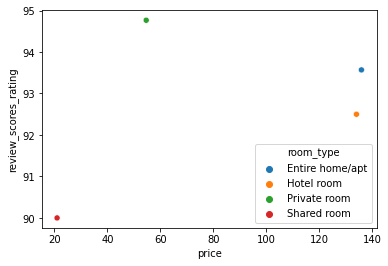

In [31]:
sns.scatterplot(data=london_scatter, x='price', y='review_scores_rating', hue='room_type')

In [53]:
# создаем запрос, db автоматически заменится на значение из database
q4 = '''
    SELECT
        DISTINCT host_id,
        host_verifications
    FROM ldn_listings
    WHERE experiences_offered != 'none' 

    
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
london_df_3 = ph.read_clickhouse(query=q4, connection=connection_default)
london_df_3

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [54]:
london_df_3['host_verifications'] = london_df_3['host_verifications'].apply(lambda x: x.replace('[', '').replace(']','').split(','))

In [55]:
london_df_3

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', ..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'go..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'gov..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio..."
4,103583,"['email', 'phone', 'reviews', 'offline_gove..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'go..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'of..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'go..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'j..."


In [56]:
london_df_3.explode('host_verifications').host_verifications.value_counts().to_frame(name='count')  # переименовываем "A" в "count"

,count
'email',1345
'phone',1345
'reviews',1309
'government_id',1196
'jumio',1115
'offline_government_id',469
'work_email',279
'facebook',270
'selfie',252
'identity_manual',227


In [57]:
# создаем запрос, db автоматически заменится на значение из database
q5 = '''
    SELECT
        neighbourhood_cleansed,
        experiences_offered,
        COUNT(experiences_offered) AS experiences_count
    FROM
        ldn_listings
    WHERE
        experiences_offered != 'none'
    GROUP BY
        neighbourhood_cleansed,
        experiences_offered
    ORDER BY 
        experiences_count DESC
    LIMIT 100 
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
london_df_4 = ph.read_clickhouse(query=q5, connection=connection_default)
london_df_4

,neighbourhood_cleansed,experiences_offered,experiences_count
0,Hackney,family,61
1,Tower Hamlets,business,58
2,Westminster,business,50
3,Hackney,social,49
4,Hammersmith and Fulham,business,48
...,...,...,...
95,Redbridge,social,2
96,Barking and Dagenham,social,2
97,Newham,romantic,1
98,Bexley,business,1


In [59]:
london_df_4_new = london_df_4.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experiences_count')

In [60]:
london_df_4_new

experiences_offered,business,family,romantic,social
neighbourhood_cleansed,,,,
Barking and Dagenham,NaN,NaN,NaN,2.0
Barnet,7.0,7.0,3.0,5.0
Bexley,1.0,NaN,NaN,NaN
Brent,9.0,21.0,5.0,6.0
Bromley,3.0,2.0,NaN,4.0
Camden,36.0,30.0,19.0,25.0
City of London,7.0,1.0,NaN,NaN
Croydon,2.0,3.0,NaN,4.0
Ealing,6.0,13.0,NaN,5.0


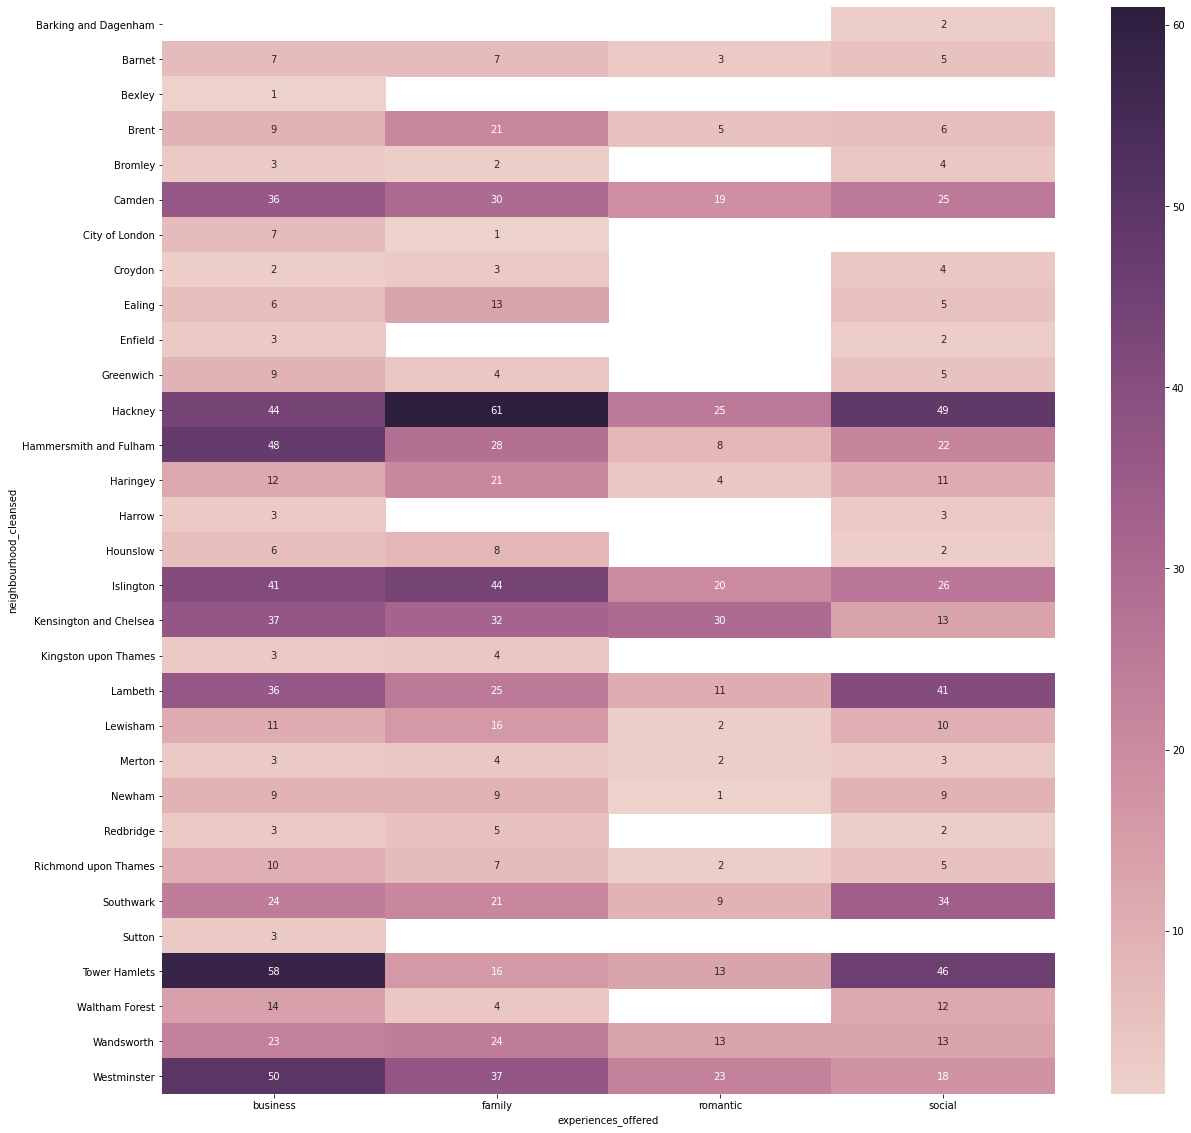

In [76]:
plt.subplots(figsize=(20,20))
sns.heatmap(data=london_df_4_new, annot=True, cmap = sns.cubehelix_palette(as_cmap=True))

In [4]:
# создаем запрос, db автоматически заменится на значение из database
q6 = '''
    SELECT 
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price_corr
    FROM
        ldn_listings
    WHERE 
        experiences_offered != 'none'
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
london_df_5 = ph.read_clickhouse(query=q6, connection=connection_default)
london_df_5

,room_type,price_corr
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
1543,Entire home/apt,100.0
1544,Entire home/apt,125.0
1545,Entire home/apt,185.0
1546,Entire home/apt,110.0


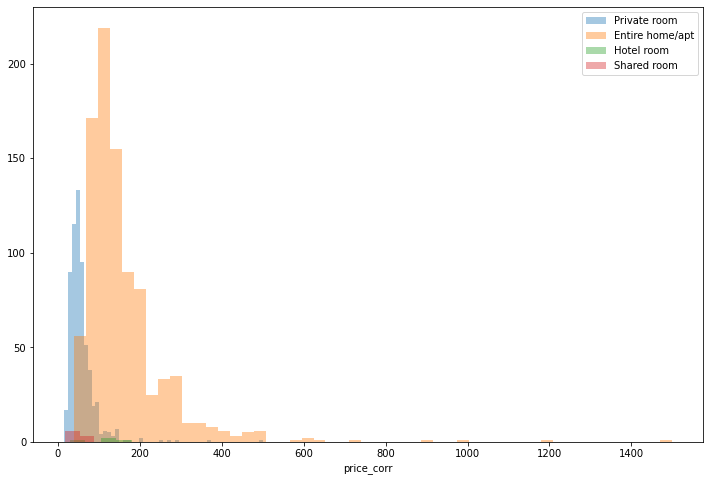

In [19]:
plt.subplots(figsize=(12,8))
sns.distplot(london_df_5.query("room_type=='Private room'").price_corr, kde=False, label='Private room')
sns.distplot(london_df_5.query("room_type=='Entire home/apt'").price_corr, kde=False, label='Entire home/apt')
sns.distplot(london_df_5.query("room_type=='Hotel room'").price_corr, kde=False, label='Hotel room')
sns.distplot(london_df_5.query("room_type=='Shared room'").price_corr, kde=False, label='Shared room')
plt.legend()
plt.show()

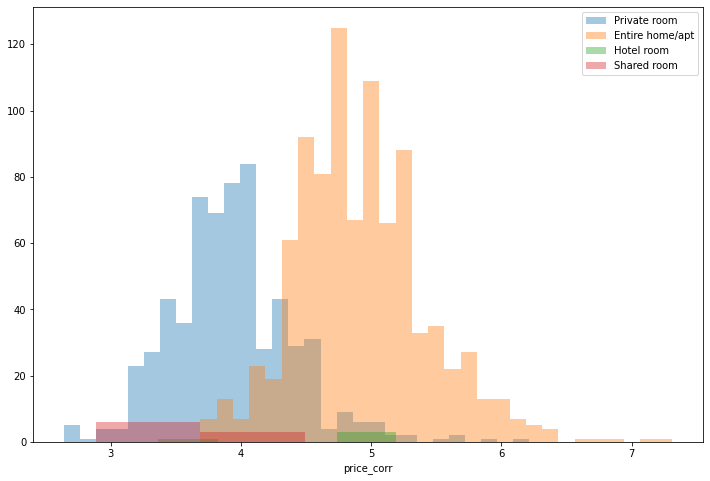

In [21]:
plt.subplots(figsize=(12,8))
sns.distplot(np.log(london_df_5.query("room_type=='Private room'").price_corr), kde=False, label='Private room')
sns.distplot(np.log(london_df_5.query("room_type=='Entire home/apt'").price_corr), kde=False, label='Entire home/apt')
sns.distplot(np.log(london_df_5.query("room_type=='Hotel room'").price_corr), kde=False, label='Hotel room')
sns.distplot(np.log(london_df_5.query("room_type=='Shared room'").price_corr), kde=False, label='Shared room')
plt.legend()
plt.show()

In [34]:
# создаем запрос, db автоматически заменится на значение из database
q7 = '''
    SELECT 
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price_corr,
        first_review

    FROM
        ldn_listings
    WHERE 
        first_review > '2010-01-01'

    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
london_df_6 = ph.read_clickhouse(query=q7, connection=connection_default)
london_df_6

,room_type,price_corr,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [35]:
london_df_6.dtypes

room_type        object
price_corr      float32
first_review     object
dtype: object

In [36]:
london_df_6['first_review'] = london_df_6['first_review'].apply(lambda x: x[:4])

In [43]:
london_df_6_new = london_df_6.groupby(['room_type', 'first_review'], as_index=False).agg({'price_corr':'mean'}).sort_values('first_review')

In [47]:
london_df_6_new = london_df_6_new.rename(columns={'first_review':'year', 'price_corr':'avg_price'})

In [49]:
london_df_6_new

,room_type,year,avg_price
0,Entire home/apt,2010,103.500000
13,Private room,2010,56.428570
11,Hotel room,2010,88.000000
1,Entire home/apt,2011,128.792450
14,Private room,2011,52.607143
2,Entire home/apt,2012,135.467255
15,Private room,2012,53.269840
24,Shared room,2012,22.000000
3,Entire home/apt,2013,137.887634
16,Private room,2013,57.036587


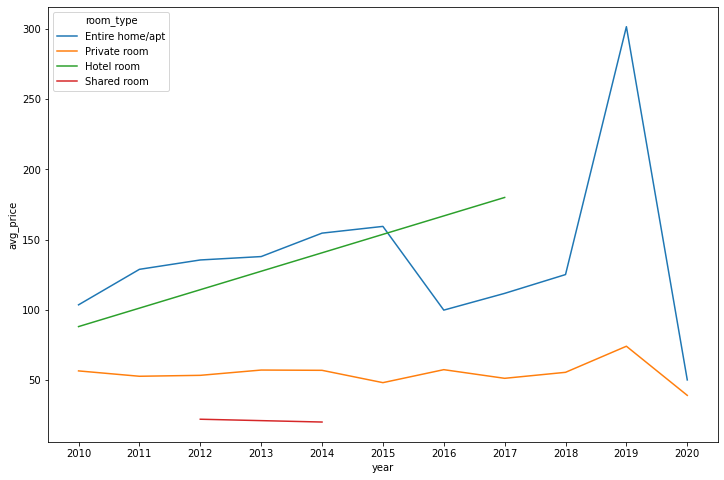

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='year',y='avg_price',hue='room_type',data=london_df_6_new)